In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.lines import Line2D
from sklearn.metrics import r2_score
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.utils import combine_prediction_files, compute_network_avg_prediction
from src import plotting #import r2_boxplots

# Load splits

In [2]:
magdir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes'
p_test_df = pd.read_csv(os.path.join(magdir, 'feature_splits', 'p.test.csv'))
p_2023_df = pd.read_csv(os.path.join(magdir, 'feature_splits','p.20230101.csv'))
s_test_df = pd.read_csv(os.path.join(magdir, 'feature_splits','s.test.csv'))
s_2023_df = pd.read_csv(os.path.join(magdir, 'feature_splits','s.20230101.csv'))
p_train_df = pd.read_csv(os.path.join(magdir, 'feature_splits', 'p.train.csv'))
s_train_df = pd.read_csv(os.path.join(magdir, 'feature_splits','s.train.csv'))

In [3]:
p_test_evids = p_test_df['Evid'].unique()
p_2023_evids = p_2023_df['Evid'].unique()
s_test_evids = s_test_df['Evid'].unique()
s_2023_evids = s_2023_df['Evid'].unique()
p_train_evids = p_train_df['Evid'].unique()
s_train_evids = s_train_df['Evid'].unique()

# Load YP21 catalogs

In [4]:
ypml_amps = pd.read_csv(f'../data/catalogs/yellowstone.amps.ypml-v5.2024.csv')

# Load predictions and results

In [5]:
selectedfeatdir = "selected_features_constHP"
summfilename = 'all.stat.results.csv'
p_resultsdir = os.path.join(magdir, 'p_models')
s_resultsdir = os.path.join(magdir, 's_models')

In [6]:
p_stats = p_test_df.station.unique()
p_sub_test_preds = combine_prediction_files(p_stats,
                                            os.path.join(p_resultsdir, selectedfeatdir),
                                            'P',
                                            'test')

p_sub_2023_preds = combine_prediction_files(p_stats,
                                            os.path.join(p_resultsdir, selectedfeatdir),
                                            'P',
                                            'holdout')

/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/B207.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/H17A.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/B208.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/B944.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/B206.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/B950.P.preds.holdout.csv does not exist, skipping...


In [7]:
s_stats = s_test_df.station.unique()
s_sub_test_preds = combine_prediction_files(s_stats,
                                            os.path.join(s_resultsdir, selectedfeatdir),
                                            'S',
                                            'test')

s_sub_2023_preds = combine_prediction_files(s_stats,
                                            os.path.join(s_resultsdir, selectedfeatdir),
                                            'S',
                                            'holdout')

/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/selected_features_constHP/B207.S.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/selected_features_constHP/B206.S.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/selected_features_constHP/B950.S.preds.holdout.csv does not exist, skipping...


In [8]:
p_sub_train_preds = combine_prediction_files(p_stats,
                                            os.path.join(p_resultsdir, selectedfeatdir),
                                            'P',
                                            'train')
s_sub_train_preds = combine_prediction_files(s_stats,
                                            os.path.join(s_resultsdir, selectedfeatdir),
                                            'S',
                                            'train')

# Compute network averages 

In [9]:
p_sub_test_avg = compute_network_avg_prediction(p_sub_test_preds)
p_sub_2023_avg = compute_network_avg_prediction(p_sub_2023_preds)

s_sub_test_avg = compute_network_avg_prediction(s_sub_test_preds)
s_sub_2023_avg = compute_network_avg_prediction(s_sub_2023_preds)

# Compute residuals

In [10]:
def get_residuals(df):
    return df['magnitude'] - df['predicted_magnitude']

def get_ypml_residuals(df, evids):
    tmp_df = df[df['Evid'].isin(evids)]
    return tmp_df['Event-Mean-YPML-S'] - tmp_df['Station-YPML-S']

In [11]:
p_sub_test_preds['residual'] = get_residuals(p_sub_test_preds)
p_sub_2023_preds['residual'] = get_residuals(p_sub_2023_preds)
s_sub_test_preds['residual'] = get_residuals(s_sub_test_preds)
s_sub_2023_preds['residual'] = get_residuals(s_sub_2023_preds)
p_sub_train_preds['residual'] = get_residuals(p_sub_train_preds)
s_sub_train_preds['residual'] = get_residuals(s_sub_train_preds)

In [12]:
ypml_p_test_resids = get_ypml_residuals(ypml_amps,
                                        p_test_evids)
ypml_s_test_resids = get_ypml_residuals(ypml_amps,
                                        s_test_evids)
ypml_p_2023_resids = get_ypml_residuals(ypml_amps,
                                        p_2023_evids)
ypml_s_2023_resids = get_ypml_residuals(ypml_amps,
                                        s_2023_evids)

In [13]:
# network avg residuals
p_sub_test_avg_resids = get_residuals(p_sub_test_avg)
p_sub_2023_avg_resids = get_residuals(p_sub_2023_avg)
s_sub_test_avg_resids = get_residuals(s_sub_test_avg)
s_sub_2023_avg_resids = get_residuals(s_sub_2023_avg)

In [14]:
SMALL_SIZE = 8
MEDIUM_SIZE = 9
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
plt.rc('figure', labelsize=MEDIUM_SIZE)

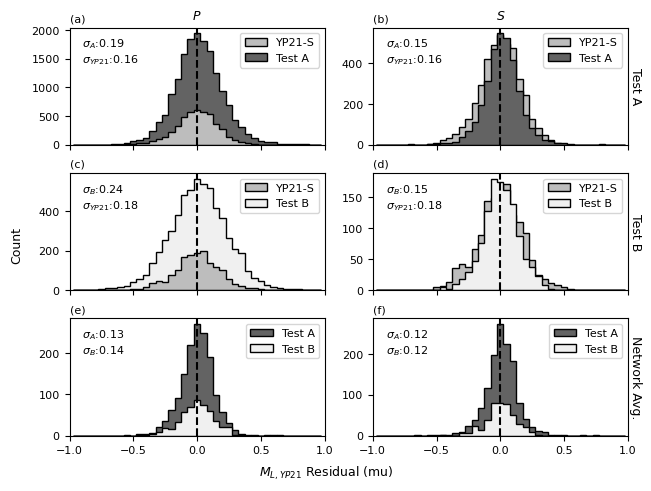

In [25]:
fig, axes = plt.subplots(3, 2, constrained_layout=True)

ypml_color = '#bdbdbd'
test_color = '#636363'
holdout_color = '#f0f0f0'
comb_color = '#636363'
comb_filt_color = 'k'
alpha=1.0
# Bins centered on 0
bins = np.concatenate([np.arange(-0.975, 0, 0.05), np.arange(0.025, 1.025, 0.05)]) 
hist_kwargs = {'bins': bins,
               'edgecolor':'k',
               'histtype': 'stepfilled',
               'align':'mid'}

p_dict = {'test': p_sub_test_preds['residual'],
          '2023':p_sub_2023_preds['residual'],
          'test_avg': p_sub_test_avg_resids,
          '2023_avg': p_sub_2023_avg_resids,
          'ypml_2023':ypml_p_2023_resids, 
          'ypml_test': ypml_p_test_resids,
          }

s_dict = {'test': s_sub_test_preds['residual'],
          '2023':s_sub_2023_preds['residual'],
          'test_avg': s_sub_test_avg_resids,
          '2023_avg': s_sub_2023_avg_resids,
          'ypml_2023':ypml_s_2023_resids, 
          'ypml_test':ypml_s_test_resids ,
          }

def plot_hist(resids_dict, axind, col_title=None, ylabel=False, test_zorder=0):
    text_y = 0.7
    # 1
    axes[0][axind].set_title(col_title)
    axes[0][axind].hist(resids_dict['ypml_test'],
                color=ypml_color,
                label='YP21-S',
                alpha=alpha,
                **hist_kwargs)
    axes[0][axind].hist(resids_dict['test'],
                    color=test_color,
                    label='Test A',
                    zorder=test_zorder,
                    **hist_kwargs);
    stdtest = np.std(resids_dict['test'])
    std2023 = np.std(resids_dict['ypml_test'])
    axes[0][axind].text(0.05, 0.70,
                        f'$\sigma_A$:{stdtest:0.2f}\n$\sigma_{{YP21}}$:{std2023:0.2f}',
                         transform=axes[0][axind].transAxes,
                         color='k',)
    if ylabel:
        axes[0][axind].yaxis.set_label_position("right")
        axes[0][axind].set_ylabel("Test A", rotation=-90, labelpad=10.0)
    axes[0][axind].set_xticklabels([])

    # 3
    axes[2][axind].hist(resids_dict['test_avg'],
                    color=test_color,
                    label='Test A',
                    **hist_kwargs)
    axes[2][axind].hist(resids_dict['2023_avg'],
                    color=holdout_color,
                    alpha=alpha,
                    label='Test B',
                    **hist_kwargs)
    stdtest = np.std(resids_dict['test_avg'])
    stdtest_ypml = np.std(resids_dict['2023_avg'])
    axes[2][axind].text(0.05, 0.70,
                        f'$\sigma_A$:{stdtest:0.2f}\n$\sigma_B$:{stdtest_ypml:0.2f}',
                         transform=axes[2][axind].transAxes,
                         color='k')
    if ylabel:
        axes[2][axind].yaxis.set_label_position("right")
        axes[2][axind].set_ylabel("Network Avg.", rotation=-90, labelpad=10.0)

    # 2

    stdpred = np.std(resids_dict['2023'])
    axes[1][axind].hist(resids_dict['ypml_2023'],
                                    color=ypml_color,
                                   #alpha=alpha,
                                   label='YP21-S',
                                   **hist_kwargs)
    axes[1][axind].hist(resids_dict['2023'],
                    color=holdout_color,
                    label='Test B',
                    zorder=test_zorder,
                    **hist_kwargs);
    stdypml_2023 = np.std(resids_dict['ypml_2023'])
    axes[1][axind].text(0.05, text_y,
                        f'$\sigma_B$:{stdpred:0.2f}\n$\sigma_{{YP21}}$:{stdypml_2023:0.2f}',
                         transform=axes[1][axind].transAxes,
                         color='k')
    if ylabel:
        axes[1][axind].yaxis.set_label_position("right")
        axes[1][axind].set_ylabel("Test B", rotation=-90, labelpad=10.0)
    axes[1][axind].set_xticklabels([])

plot_hist(p_dict, 0, "$\it{P}$")
plot_hist(s_dict, 1,  "$\it{S}$", True, test_zorder=1)

subpanel_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']
for i, ax in enumerate(axes.flatten()):
    ax.set_xlim([-1, 1])
    ax.axvline(0, color='k', linestyle='--', zorder=2)
    ax.legend(loc='upper right')
    ax.text(0, 1.05, subpanel_labels[i], 
    transform=ax.transAxes,)

fig.supylabel("Count")
fig.supxlabel('$M_{L,YP21}$ Residual (mu)') # (wrt $M_{L, YP21}$)')
fig.savefig('../figures/summaryFigResidualHistograms.png', dpi=300)

In [26]:
fig.get_size_inches()

array([6.4, 4.8])

# Residuals as a function of magnitude

4.332082058224121
4.326332574321018
3.4466311934806155
3.3441340178495875
3.6150559021178994
3.6150559021178994


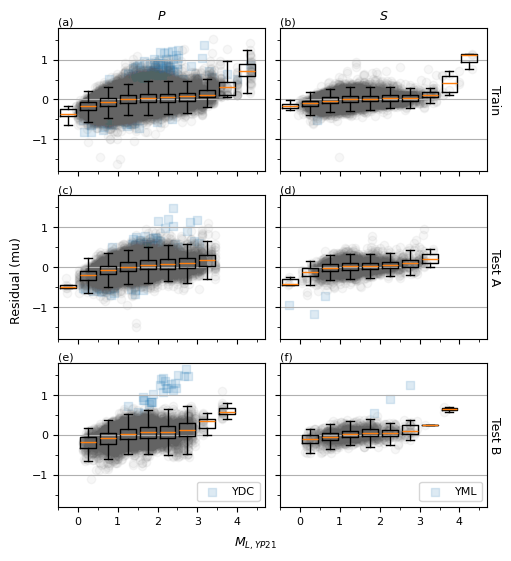

In [15]:
fig, axes = plt.subplots(3, 2, constrained_layout=True, figsize=(5, 5.5))
ylabels = ['Train', 'Test A', 'Test B']
titles = ['$\it{P}$', '$\it{S}$']
axes = axes.flatten()
for i, ds in enumerate([p_sub_train_preds, s_sub_train_preds, p_sub_test_preds, s_sub_test_preds, p_sub_2023_preds, s_sub_2023_preds]):
    ax = axes[i]
    if i%2==0:
        ds_ydc = ds[(ds['station'] == 'YDC') & (abs(ds['residual']) > 0.5)]
        ax.scatter(ds_ydc['magnitude'], ds_ydc['residual'], alpha=0.15, color='C0', marker='s', label='YDC')    
        ax.scatter(ds[ds['station'] != 'YDC']['magnitude'], ds[ds['station'] != 'YDC']['residual'], alpha=0.05, color='#636363')    
    else:
        stat = 'YML'
        ds_yml = ds[(ds['station'] == stat) & (abs(ds['residual']) > 0.5)]
        ax.scatter(ds_yml['magnitude'], ds_yml['residual'], alpha=0.15, color='C0', marker='s', label=stat)  
        ax.scatter(ds[ds['station'] != stat]['magnitude'], ds[ds['station'] != stat]['residual'], alpha=0.05, color='#636363')    

    # m ,b  = np.polyfit(X, y, deg=1)
    # ax.plot(np.arange(-0.5, 5.5), m*np.arange(-0.5, 5.5)+b, color='r')

    #ax.axhline(0, color='#bdbdbd', linestyle='--', linewidth=1)

    mag_low = -0.5
    for mag_upp in np.arange(0, 5.0, 0.5):
        ax.boxplot(ds[(ds['magnitude'] > mag_low )& (ds['magnitude']  <= mag_upp)]['residual'].values, 
                    positions=[mag_upp-0.25],
                    showfliers=False,
                    widths=0.4,
                    zorder=2)
        mag_low = mag_upp
    print(ds['magnitude'].max())
    ax.set_aspect('equal', adjustable='box')
    ax.set_ylim([-1.8, 1.8])
    ax.set_xlim([-0.5, 4.7])

    ax.set_xticks(np.arange(0, 5), np.arange(0, 5)) 

    if i < 4:
        ax.set_xticklabels([])
    else:
        ax.legend(loc='lower right')

    if i < 2:
        ax.set_title(titles[i])

    if i%2 == 1:
        ax.set_yticklabels([])
        ax.yaxis.set_label_position("right")
        ax.set_ylabel(ylabels[i//2], rotation=-90, labelpad=10.0)

    ax.yaxis.set_minor_locator(MultipleLocator(0.5))
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))

    ax.grid(axis='y')
fig.supxlabel("$M_{L,YP21}$")
fig.supylabel("Residual (mu)")

subpanel_labels = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)"]
for i, ax in enumerate(axes):
    ax.text(0, 1.02, subpanel_labels[i], 
    transform=ax.transAxes,)

fig.savefig('../figures/summaryFigResidualsVMag.png', dpi=300)